### Jupyterlab magic
Spodnja celica uvozi vse knjižnice (mogoče tudi kakšno preveč) in pripravi nastavitve, ki jih potrebujemo kasneje za računanje in risanje. Poženi pred čemerkoli drugim

In [3]:
import IPython.display as ipd
from math import pi
from numpy import *
from scipy.stats import norm
from scipy.constants import *
from scipy.io import wavfile
from ipywidgets import *
from matplotlib import pyplot as plt
from matplotlib import rcParams as MpRcParams
MpRcParams['mathtext.fontset'] = 'cm'
MpRcParams['mathtext.rm'] = 'serif'
MpRcParams['mathtext.rm'] = 'serif'
%matplotlib inline

# Grobo + fino kodiranje

Kodiranje signala se da razdeliti v osnovno, grobo kodiranje in dodatke za izboljšanje kvalitete, ki se glede na razpoložljivost kapacitet pošiljajo ali pa ne.

Posneti signal ima 16 bitno ločljivost. Ta signal bomo bolj grobo kvantizirali tako, da ga bomo delili z $2^n$, kar je ekvivalent binarnemu pomiku v desno, in odstranili vse kar je za decimalno vejico z ukazom int_ (celo število od ...). Signal nato nazaj pomnožimo z $2^n$, da ohranimo začetno glasnost signala.

Ustvarimo več signalov z različnimi ločljivostmi, nato izračunamo razlike med njimi, ki predstavljajo korekcije, ki so potrebne, da grobo kvantizirani signal izboljšamo.

<ipython-input-4-a768ccf056ed>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, sound_data = wavfile.read('sample44100.wav')


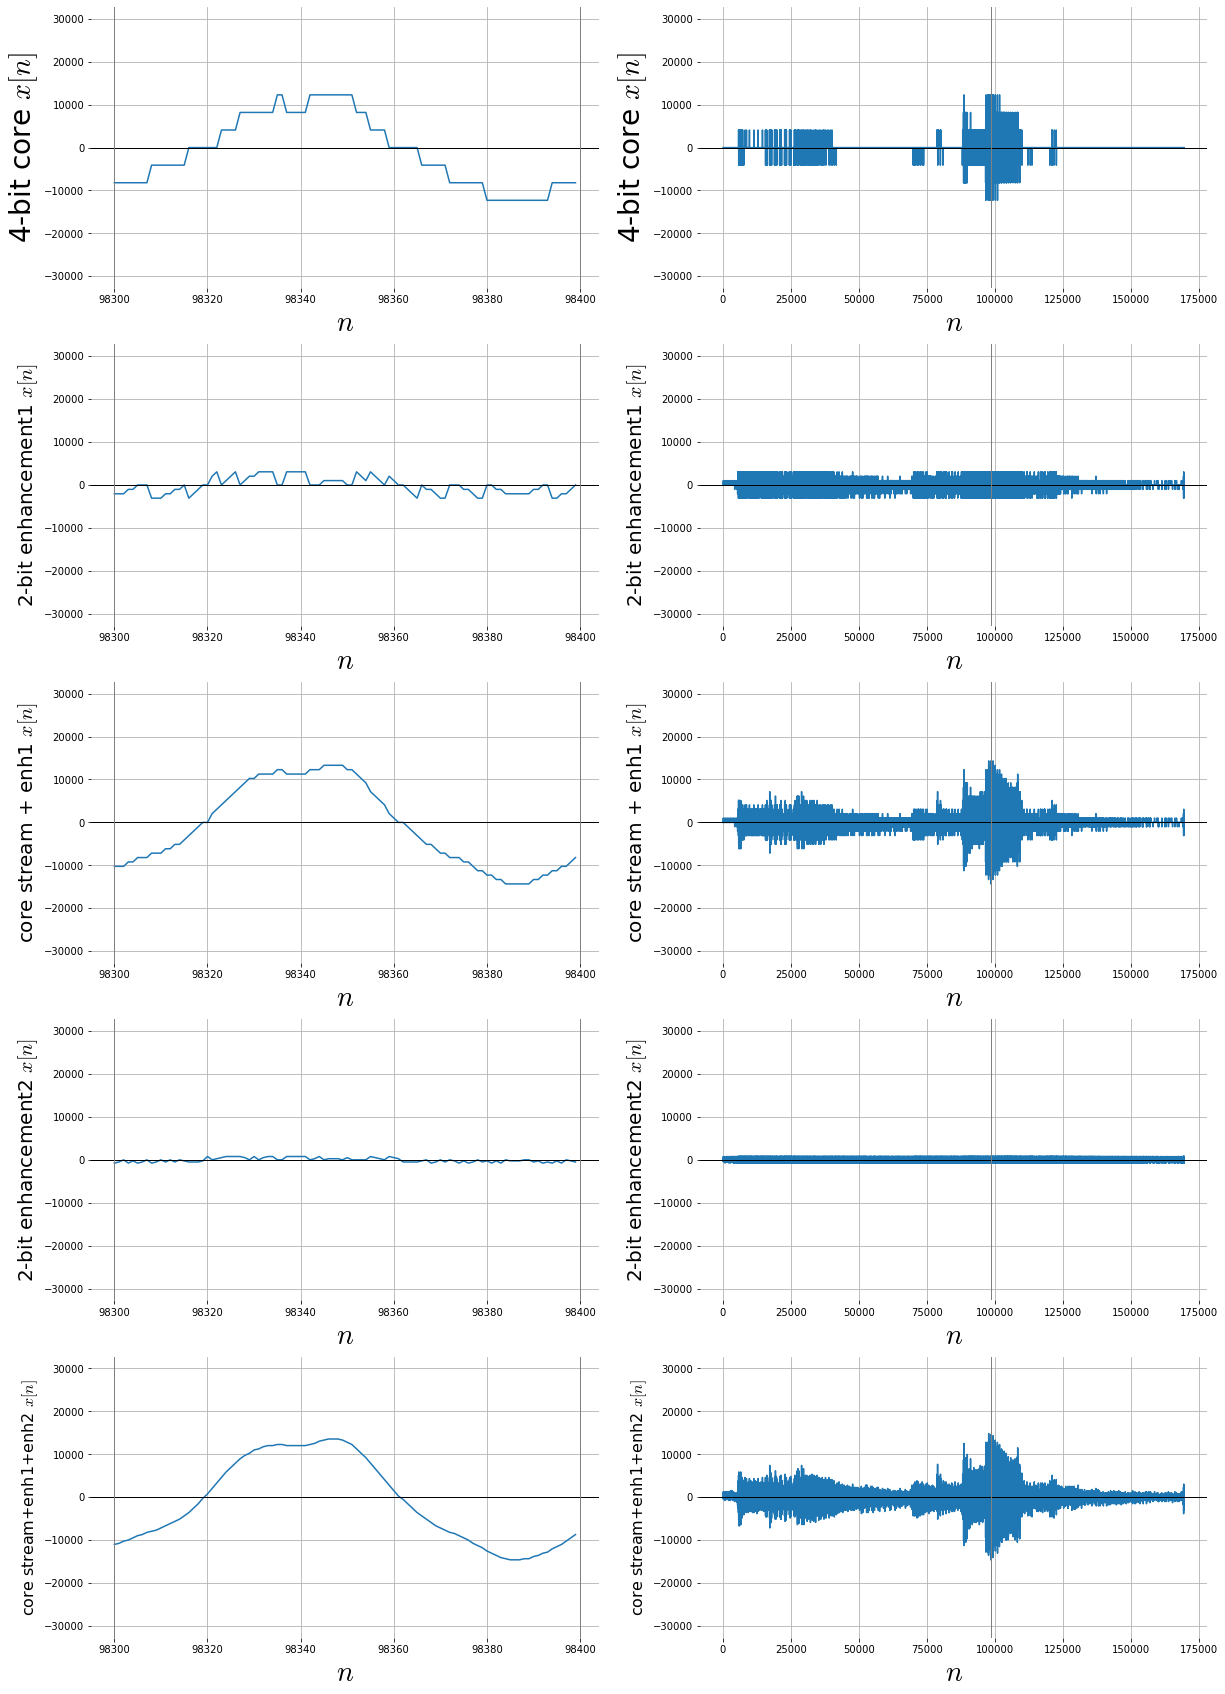

In [4]:
#preberi vzorec signala
samplerate, sound_data = wavfile.read('sample44100.wav')
#in ga razdeli na levi in desni kanal. Za demonstracijo bomo uporabili samo en kanal
x_left=sound_data[:,0]
x_right=sound_data[:,1]


x_core4bit=int_(x_left/2**(16-4))*2**(16-4)          #4-bitni signal
x_6bit=int_(x_left/2**(16-6))*2**(16-6)              #6-bitni signal
x_8bit=int_(x_left/2**(16-8))*2**(16-8)              #8-bitni signal
x_12bit=int_(x_left/2**(16-12))*2**(16-12)           #12-bitni signal

x_quality_addition1=x_6bit-x_core4bit              #korekcijski signal, ki izboljša 4-bitni signal na 6 bitov
x_quality_addition2=x_8bit-x_6bit                  #korekcijski signal, ki izboljša 6-bitni signal na 8 bitov
x_quality_addition3=x_12bit-x_8bit                 #korekcijski signal, ki izboljša 8-bitni signal na 12 bitov
x_quality_addition4=x_left-x_12bit                 #korekcijski signal, ki izboljša 12-bitni signal na originalno kvaliteto (16 bitov)

#Risanje
fig, ax = plt.subplots(5,2,figsize=(20,30))
seg_start=98300
seg_length=100
ax[0,0].plot(range(seg_start,seg_start+seg_length),x_core4bit[seg_start:seg_start+seg_length])
ax[0,1].plot(x_core4bit)
ax[1,0].plot(range(seg_start,seg_start+seg_length),x_quality_addition1[seg_start:seg_start+seg_length])
ax[1,1].plot(x_quality_addition1)
ax[2,0].plot(range(seg_start,seg_start+seg_length),x_core4bit[seg_start:seg_start+seg_length]+x_quality_addition1[seg_start:seg_start+seg_length])
ax[2,1].plot(x_core4bit+x_quality_addition1)
ax[3,0].plot(range(seg_start,seg_start+seg_length),x_quality_addition2[seg_start:seg_start+seg_length])
ax[3,1].plot(x_quality_addition2)
ax[4,0].plot(range(seg_start,seg_start+seg_length),x_core4bit[seg_start:seg_start+seg_length]+x_quality_addition1[seg_start:seg_start+seg_length]+x_quality_addition2[seg_start:seg_start+seg_length])
ax[4,1].plot(x_core4bit+x_quality_addition1+x_quality_addition2)

for j in range(0,2):
    for i in range(0,5):
        ax[i,j].axhline(0, color='black', lw=1)
        ax[i,j].axvline(seg_start, color='gray', lw=1)
        ax[i,j].axvline(seg_start+seg_length, color='gray', lw=1)
        ax[i,j].set_xlabel(r'$n$', fontsize=28)
        ax[i,j].grid(which="both")
        ax[i,j].set_ylim([-2**15,2**15-1])
        ax[i,j].set_frame_on(False)
    ax[0,j].set_ylabel(r'4-bit core $x[n]$', fontsize=28)
    ax[1,j].set_ylabel(r'2-bit enhancement1 $x[n]$', fontsize=20)
    ax[2,j].set_ylabel(r'core stream + enh1 $x[n]$', fontsize=20)
    ax[3,j].set_ylabel(r'2-bit enhancement2 $x[n]$', fontsize=20)
    ax[4,j].set_ylabel(r'core stream+enh1+enh2 $x[n]$', fontsize=16)

plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16) 

# Play Audio

In [5]:
ipd.Audio(x_core4bit,rate=samplerate)

In [6]:
ipd.Audio(x_core4bit+x_quality_addition1,rate=samplerate)

In [7]:
ipd.Audio(x_core4bit+x_quality_addition1+x_quality_addition2,rate=samplerate)

In [8]:
ipd.Audio(x_core4bit+x_quality_addition1+x_quality_addition2+x_quality_addition3,rate=samplerate)

In [9]:
ipd.Audio(x_core4bit+x_quality_addition1+x_quality_addition2+x_quality_addition3+x_quality_addition4,rate=samplerate)